# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

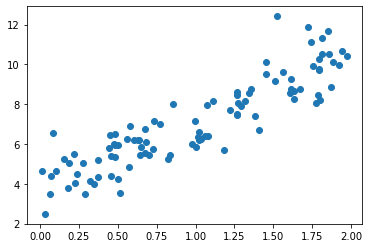

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

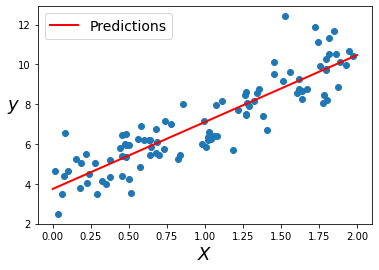

In [6]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [7]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [8]:
X_new.shape

(2, 1)

In [9]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [10]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [11]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

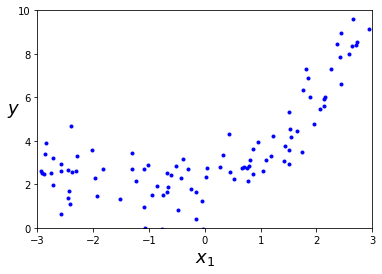

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [13]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [15]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [16]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [17]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [18]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

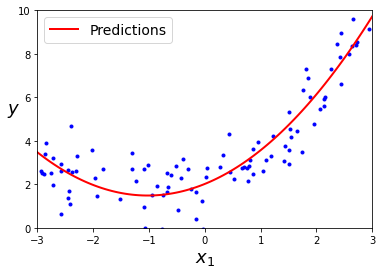

In [19]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [20]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [21]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [22]:
len(X)

1000

In [23]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

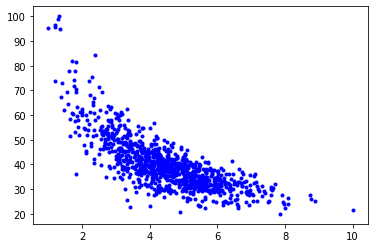

In [24]:
plt.plot(X,y,'b.')

In [34]:
# Importar train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

## 1.1. LINEAL

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("X Train size: ", X_train.shape, " X Test size: ", X_test.shape, " y Train size: ", y_train.shape, "y Test size: ", y_test.shape)

X Train size:  (800, 1)  X Test size:  (200, 1)  y Train size:  (800,) y Test size:  (200,)


In [43]:
# Fit
l_r = LinearRegression(fit_intercept=True)
l_r.fit(X_train, y_train)

l_r.coef_, l_r.intercept_

(array([-5.94290725]), 66.5290930515459)

#### Ecuación
$\hat{y} =  -6.05X + 67.19$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


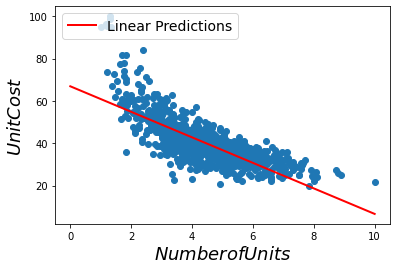

In [39]:
# Plot
X_fit_l = np.linspace(0, 10)
y_fit_l = l_r.predict(X_fit_l[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit_l, y_fit_l, "r-", linewidth=2, label="Linear Predictions")
plt.xlabel("$Number of Units$", fontsize=18)
plt.ylabel("$Unit Cost$", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [44]:
# Evaluación
y_pred = l_r.predict(X_test)

l_mae = metrics.mean_absolute_error(y_test, y_pred)
l_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
l_r2 = r2_score(y_test, y_pred)

print('Error medio Absoluto (MAE):', l_mae)
print('Root Mean Squared Error:', l_rmse)
print('r2_score', l_r2)

Error medio Absoluto (MAE): 5.2114908832649425
Root Mean Squared Error: 7.762992923282068
r2_score 0.5733065661181481


## 1.2. POLINOMIAL

In [45]:
# Split data
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size = 0.2)
print("X Train size: ", X_train_p.shape, " X Test size: ", X_test_p.shape, " y Train size: ", y_train_p.shape, "y Test size: ", y_test_p.shape)

X Train size:  (800, 2)  X Test size:  (200, 2)  y Train size:  (800,) y Test size:  (200,)


In [46]:
# Fit
l_r_p = LinearRegression(fit_intercept=True)
l_r_p.fit(X_train_p, y_train_p)

l_r_p.coef_, l_r_p.intercept_

(array([-17.41140702,   1.2280128 ]), 91.03275218762789)

#### Ecuación

$\hat{y} =  -17.41X +1.22X^2 + 91.03$

In [49]:
# Evaluación
y_pred_p = l_r_p.predict(X_test_p)

l_p_mae = metrics.mean_absolute_error(y_test_p, y_pred_p)
l_p_rmse = np.sqrt(metrics.mean_squared_error(y_test_p, y_pred_p))
l_p_r2 = r2_score(y_test_p, y_pred_p)

print('Error medio Absoluto (MAE):', l_p_mae)
print('Root Mean Squared Error:', l_p_rmse)
print('r2_score', l_p_r2)

Error medio Absoluto (MAE): 4.6368799193866
Root Mean Squared Error: 5.8625544095218
r2_score 0.6393120572401133


## 1.3. RIDGE

In [50]:
from sklearn.linear_model import Ridge

# Fit
ridge = Ridge(fit_intercept=True)
ridge.fit(X_train, y_train)

ridge.coef_, ridge.intercept_

(array([-5.93858451]), 66.50967582183648)

#### Ecuación
$\hat{y} =  -5.93X + 66.5$

In [53]:
# Evaluación
y_pred_r = ridge.predict(X_test)

r_mae = metrics.mean_absolute_error(y_test, y_pred_r)
r_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_r))
r_r2 = r2_score(y_test, y_pred_r)

print('Error medio Absoluto (MAE):', r_mae)
print('Root Mean Squared Error:', r_rmse)
print('r2_score', r_r2)

Error medio Absoluto (MAE): 5.211104863661549
Root Mean Squared Error: 7.763450234504415
r2_score 0.5732562923525362


## 1.4. LASSO

In [54]:
from sklearn.linear_model import Lasso

# Fit
lasso = Lasso(fit_intercept=True)
lasso.fit(X_train, y_train)

lasso.coef_, lasso.intercept_

(array([-5.3605816]), 63.91335461309028)

#### Ecuación
$\hat{y} =  -5.36X + 63.9$

In [56]:
# Evaluación
y_pred_ls = lasso.predict(X_test)

ls_mae = metrics.mean_absolute_error(y_test, y_pred_ls)
ls_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls))
ls_r2 = r2_score(y_test, y_pred_ls)

print('Error medio Absoluto (MAE):', ls_mae)
print('Root Mean Squared Error:', ls_rmse)
print('r2_score', ls_r2)

Error medio Absoluto (MAE): 5.19630866634277
Root Mean Squared Error: 7.868361180756245
r2_score 0.5616448093571498


## Models Evaluation

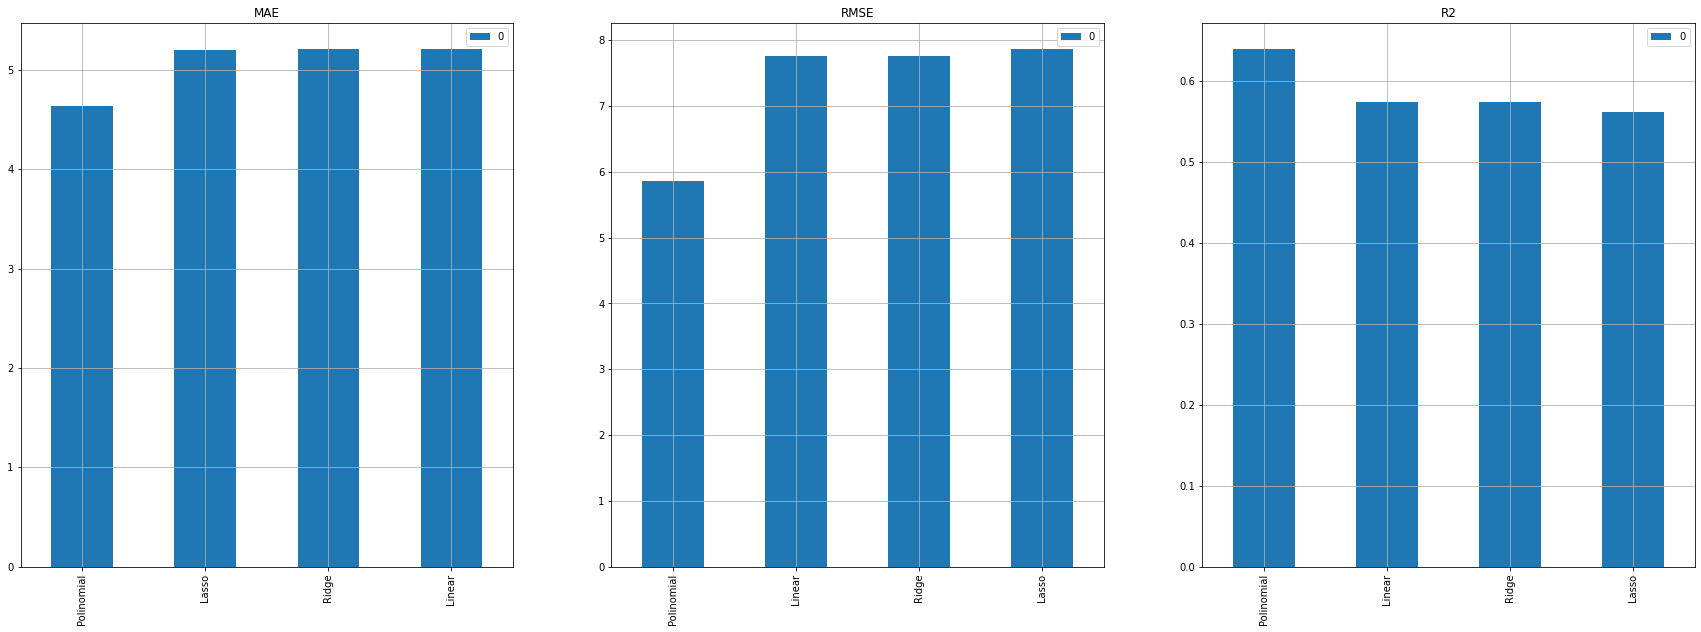

In [95]:
fig, ax = plt.subplots(1,3, figsize = (30,10))
# MAE
mae = pd.DataFrame([l_mae, l_p_mae, r_mae, ls_mae], index = ["Linear","Polinomial", "Ridge", "Lasso"])
mae.sort_values(by = 0).plot(kind = 'bar', ax = ax[0], title = "MAE", grid = True, sort_columns = True)

# RMSE
rmse = pd.DataFrame([l_rmse, l_p_rmse, r_rmse, ls_rmse], index = ["Linear","Polinomial", "Ridge", "Lasso"])
rmse.sort_values(by = 0).plot(kind = 'bar', ax = ax[1], title = "RMSE", grid = True, sort_columns = True)

# R2
r2 = pd.DataFrame([l_r2, l_p_r2, r_r2, ls_r2], index = ["Linear","Polinomial", "Ridge", "Lasso"])
r2.sort_values(by = 0, ascending = False).plot(kind = 'bar', ax = ax[2], title = "R2", grid = True, sort_columns = True)

## Resultados
El modelo con mejor rendimiento es el **Modelo Lineal Polinomial (cuadrático)** debido a:
- **Menor MAE** de todos (4.6 mientras que los otros >5), lo cual significa que tiene un promedio de error absoluto menor que cualquier otro modelo.
- **Menor RMSE** de todos (5.8 mientras que los otros >7), lo cual significa que tiene una ra[iz de promedios cuadrados menor que cualquier otro modelo.
- **Mayor R2** de todos (>0.6 mientras que otros <0.6)

De todos estos resultados, se sugiere utilizar el **Modelo Lineal Polinomial (cuadrático)**

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9547,868001790,20150316T000000,1300000.0,3,1.00,2040,7936,1.0,0,3,...,8,1680,360,1940,0,98177,47.7028,-122.385,2300,10080
2172,9269260240,20150424T000000,501000.0,4,2.25,2680,5439,2.0,0,0,...,7,2680,0,2000,0,98011,47.7534,-122.218,2460,4473
1165,3705900238,20140828T000000,439995.0,3,1.75,1570,8400,1.0,0,0,...,7,1570,0,1959,0,98133,47.7600,-122.340,1860,8639
1942,3826500570,20140829T000000,275000.0,3,1.75,1490,8000,1.0,0,0,...,8,1490,0,1978,0,98030,47.3817,-122.166,1740,8165
5639,7224000980,20140610T000000,100000.0,4,1.00,1120,2685,1.0,0,0,...,5,860,260,1939,0,98055,47.4904,-122.203,1120,4838
21167,8856003839,20141210T000000,215000.0,3,2.50,1322,6006,2.0,0,0,...,7,1322,0,2009,0,98001,47.2706,-122.254,1440,6796
6340,1442700250,20140716T000000,480000.0,4,2.50,3620,16000,2.0,0,0,...,9,3620,0,1976,0,98038,47.3711,-122.060,2590,16000
15192,3625059109,20140508T000000,1051000.0,4,3.00,2920,33976,1.0,0,3,...,8,1460,1460,1964,0,98008,47.6164,-122.104,2970,15210
3253,9828702095,20140925T000000,439000.0,1,1.00,790,2400,1.0,0,0,...,7,790,0,1918,0,98122,47.6178,-122.299,1580,2566
17424,3388000080,20150422T000000,281700.0,3,1.00,1570,8316,1.0,0,0,...,7,1070,500,1962,0,98031,47.3943,-122.198,2030,8295


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [115]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [116]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


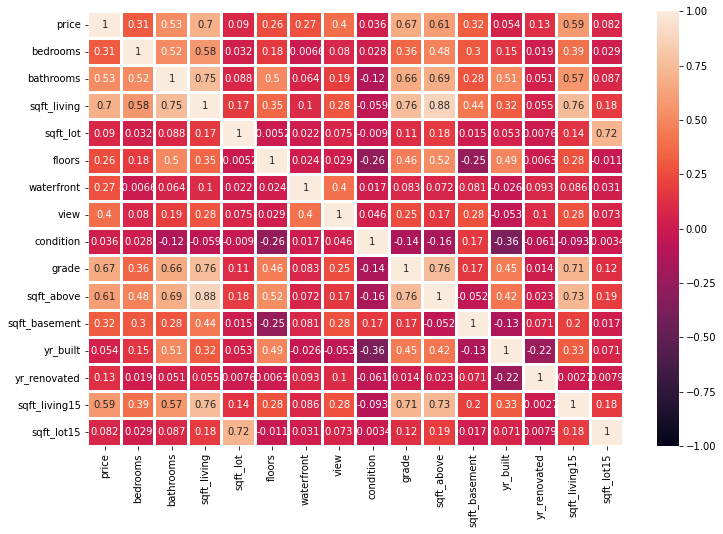

In [117]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot=True, linewidths = 2)
plt.show()

In [118]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [119]:
# ESTANDARIZANDO LOS DATOS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_scaled = scaler.fit_transform(X)
X_scaled

array([[9.09090909e-02, 1.25000000e-01, 6.71698113e-02, ...,
        0.00000000e+00, 1.61934263e-01, 5.74235339e-03],
       [9.09090909e-02, 2.81250000e-01, 1.72075472e-01, ...,
        9.88089330e-01, 2.22164860e-01, 8.02711852e-03],
       [6.06060606e-02, 1.25000000e-01, 3.62264151e-02, ...,
        0.00000000e+00, 3.99414903e-01, 8.51301880e-03],
       ...,
       [6.06060606e-02, 9.37500000e-02, 5.50943396e-02, ...,
        0.00000000e+00, 1.06866288e-01, 1.55763777e-03],
       [9.09090909e-02, 3.12500000e-01, 9.88679245e-02, ...,
        0.00000000e+00, 1.73980382e-01, 7.30573466e-04],
       [6.06060606e-02, 9.37500000e-02, 5.50943396e-02, ...,
        0.00000000e+00, 1.06866288e-01, 8.10982495e-04]])

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X_scaled)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## 2.1. LINEAL

In [121]:
# Fit
m_r = LinearRegression(fit_intercept=True)
m_r.fit(X_train, y_train)

m_r.coef_, m_r.intercept_

(array([[-1.26026384e+06,  3.31674931e+05, -8.80206738e+17,
          2.82209167e+04,  7.91345268e+04,  5.52714827e+05,
          1.64973229e+05,  8.50404779e+04,  1.43393931e+06,
          6.05847958e+17,  3.20195961e+17, -4.08153723e+05,
          2.67515913e+04,  1.68484033e+05, -4.76874833e+05]]),
 array([-367317.02906405]))

In [123]:
# Evaluación
y_pred = m_r.predict(X_test)

m_mae = metrics.mean_absolute_error(y_test, y_pred)
m_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
m_r2 = r2_score(y_test, y_pred)

print('Error medio Absoluto (MAE):', m_mae)
print('Root Mean Squared Error:', m_rmse)
print('r2_score', m_r2)

Error medio Absoluto (MAE): 137450.55714342956
Root Mean Squared Error: 232149.35026210602
r2_score 0.6579252209145268


## 1.2. POLINOMIAL

In [124]:
# Split data
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size = 0.2)
print("X Train size: ", X_train_p.shape, " X Test size: ", X_test_p.shape, " y Train size: ", y_train_p.shape, "y Test size: ", y_test_p.shape)

X Train size:  (17290, 135)  X Test size:  (4323, 135)  y Train size:  (17290, 1) y Test size:  (4323, 1)


In [125]:
# Fit
m_r_p = LinearRegression(fit_intercept=True)
m_r_p.fit(X_train_p, y_train_p)

m_r_p.coef_, m_r_p.intercept_

(array([[ 1.01858054e+06, -8.74197247e+05, -4.40684784e+15,
         -1.08381722e+06, -2.44718179e+05, -1.48720815e+14,
         -2.57216133e+05,  2.79161199e+04,  3.04014781e+05,
          3.03324168e+15,  1.60309484e+15,  1.43798978e+05,
         -5.03982580e+06,  6.58702511e+05,  7.05695616e+05,
          1.02373577e+06,  5.93711083e+05,  7.09245910e+15,
         -5.40830499e+06,  1.37208093e+06,  2.09556172e+06,
         -5.07525644e+05, -6.43771343e+05, -6.77334934e+05,
         -4.88175299e+15, -2.58004928e+15, -1.61593859e+06,
         -3.50503517e+05,  3.94498546e+06,  7.22895070e+06,
         -1.82738983e+05,  3.98012558e+14, -6.19714792e+06,
         -6.47535500e+05,  3.54572250e+05,  2.36825250e+05,
         -6.91211250e+04,  1.64279088e+06, -2.73952792e+14,
         -1.44786454e+14,  3.38000289e+05, -4.32235500e+05,
         -1.02434894e+06,  2.81948776e+06, -3.67494492e+15,
          5.72731993e+12,  6.86604872e+14,  3.46575146e+12,
          3.05333702e+13, -8.03745755e+1

In [126]:
# Evaluación
y_pred_p = m_r_p.predict(X_test_p)

m_p_mae = metrics.mean_absolute_error(y_test_p, y_pred_p)
m_p_rmse = np.sqrt(metrics.mean_squared_error(y_test_p, y_pred_p))
m_p_r2 = r2_score(y_test_p, y_pred_p)

print('Error medio Absoluto (MAE):', m_p_mae)
print('Root Mean Squared Error:', m_p_rmse)
print('r2_score', m_p_r2)

Error medio Absoluto (MAE): 125287.6843550968
Root Mean Squared Error: 189649.9544185037
r2_score 0.7252700181066565


## 1.3. RIDGE

In [127]:
from sklearn.linear_model import Ridge

# Fit
m_ridge = Ridge(fit_intercept=True)
m_ridge.fit(X_train, y_train)

m_ridge.coef_, m_ridge.intercept_

(array([[-1126304.19140164,   327291.33273014,   773488.22329925,
            -5102.40643566,    81851.98807468,   549961.62477854,
           167934.62135434,    84333.35795694,  1426557.7521267 ,
           852956.54747274,   512397.35389697,  -406520.51984161,
            27685.60639207,   178849.08660945,  -423832.99152081]]),
 array([-372966.09776691]))

In [128]:
# Evaluación
y_pred_r_m = m_ridge.predict(X_test)

m_r_mae = metrics.mean_absolute_error(y_test, y_pred_r_m)
m_r_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_r_m))
m_r_r2 = r2_score(y_test, y_pred_r_m)

print('Error medio Absoluto (MAE):', m_r_mae)
print('Root Mean Squared Error:', m_r_rmse)
print('r2_score', m_r_r2)

Error medio Absoluto (MAE): 137287.23303128258
Root Mean Squared Error: 232393.1159292981
r2_score 0.6572064606341811


## 1.4. LASSO

In [130]:
from sklearn.linear_model import Lasso

# Fit
m_lasso = Lasso(fit_intercept=True, max_iter = 10000)
m_lasso.fit(X_train, y_train)

m_lasso.coef_, m_lasso.intercept_

(array([-1258010.75610011,   331532.18888957,  2063111.39044776,
           23154.5748867 ,    79224.31678286,   552575.65492398,
          165062.60933435,    84833.79948738,  1434062.25638004,
               0.        ,    59913.58538309,  -408317.5802194 ,
           26713.74454079,   168511.79667834,  -472959.15118933]),
 array([-366724.68069475]))

In [131]:
# Evaluación
y_pred_ls_m = m_lasso.predict(X_test)

m_ls_mae = metrics.mean_absolute_error(y_test, y_pred_ls_m)
m_ls_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ls_m))
m_ls_r2 = r2_score(y_test, y_pred_ls_m)

print('Error medio Absoluto (MAE):', m_ls_mae)
print('Root Mean Squared Error:', m_ls_rmse)
print('r2_score', m_ls_r2)

Error medio Absoluto (MAE): 137474.02899266154
Root Mean Squared Error: 232136.62907142236
r2_score 0.6579627095334668


## Models Evaluation

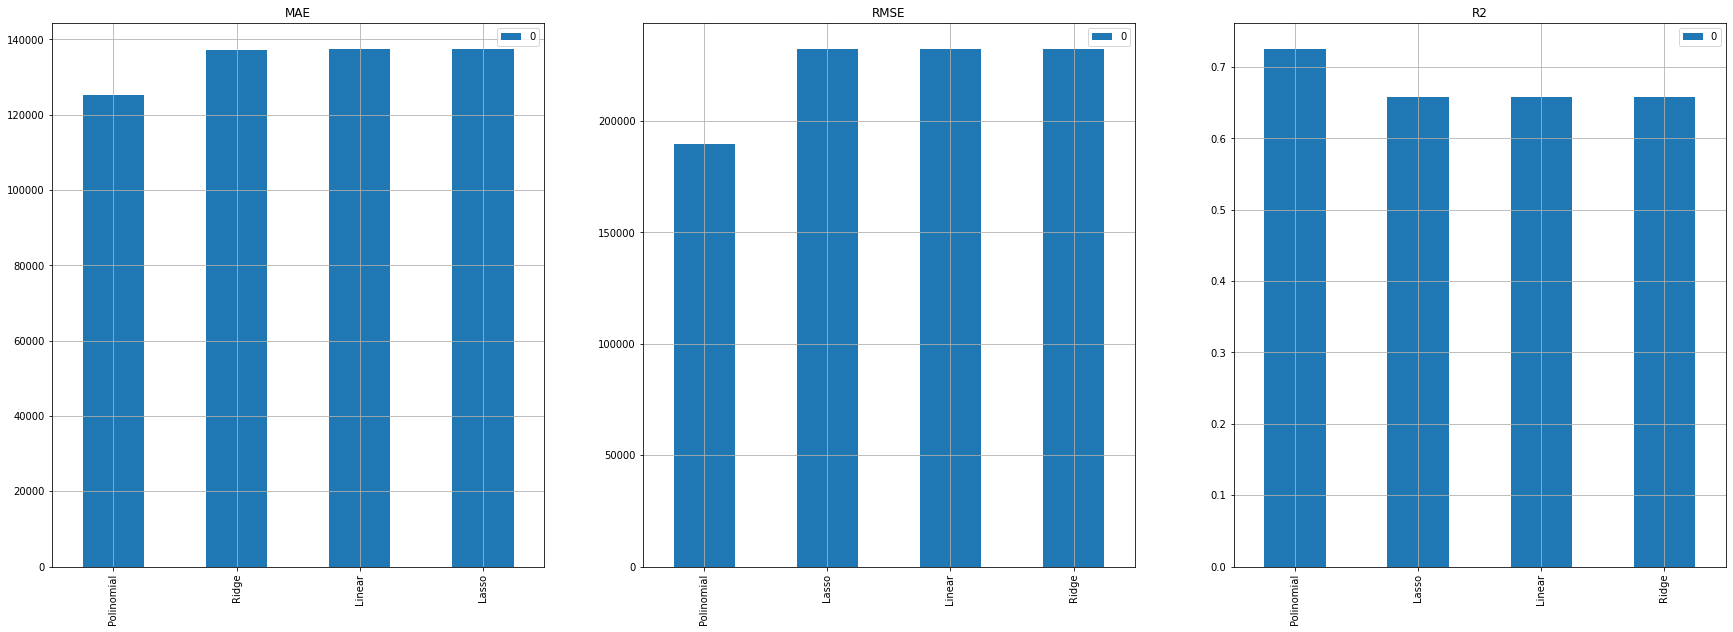

In [132]:
fig, ax = plt.subplots(1,3, figsize = (30,10))
# MAE
m_mae = pd.DataFrame([m_mae, m_p_mae, m_r_mae, m_ls_mae], index = ["Linear","Polinomial", "Ridge", "Lasso"])
m_mae.sort_values(by = 0).plot(kind = 'bar', ax = ax[0], title = "MAE", grid = True, sort_columns = True)

# RMSE
m_rmse = pd.DataFrame([m_rmse, m_p_rmse, m_r_rmse, m_ls_rmse], index = ["Linear","Polinomial", "Ridge", "Lasso"])
m_rmse.sort_values(by = 0).plot(kind = 'bar', ax = ax[1], title = "RMSE", grid = True, sort_columns = True)

# R2
m_r2 = pd.DataFrame([m_r2, m_p_r2, m_r_r2, m_ls_r2], index = ["Linear","Polinomial", "Ridge", "Lasso"])
m_r2.sort_values(by = 0, ascending = False).plot(kind = 'bar', ax = ax[2], title = "R2", grid = True, sort_columns = True)

## Resultados
El modelo con mejor rendimiento es el **Modelo Lineal Polinomial (cuadrático)** debido a:
- **Menor MAE** de todos (125K mientras que los otros >135K), lo cual significa que tiene un promedio de error absoluto menor que cualquier otro modelo.
- **Menor RMSE** de todos (<200K mientras que los otros >250K), lo cual significa que tiene una ra[iz de promedios cuadrados menor que cualquier otro modelo.
- **Mayor R2** de todos (>0.7 mientras que otros <0.7)

De todos estos resultados, se sugiere utilizar el **Modelo Lineal Polinomial (cuadrático)**